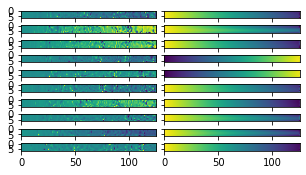

In [1]:
from dcgan import Generator, Discriminator, weights_init
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from reader import CustomImageDataset

In [2]:
# Root directory for dataset
root_dir= 'Data/room=[6,6,2.4]'
ngpu=1
# Decide which device we want to run on
device = torch.device("cuda:0" if (
    torch.cuda.is_available() and ngpu > 0) else "cpu")

In [3]:
# training_data = CustomImageDataset(root_dir)
# train_dataloader = DataLoader(training_data, batch_size=1, shuffle=True)

In [4]:
gen = Generator(ngpu).to(device)
# disc = Discriminator(ngpu).to(device)
gen.apply(weights_init)
# disc.apply(weights_init)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(16, 128, kernel_size=(4, 4), stride=(1, 3), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(1, 3), padding=(1, 1), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(1, 3), padding=(1, 1), bias=False)
    (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=(1, 4), padding=(1, 1), bias=False)
    (10): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

In [5]:
noise = torch.randn(1, 16, 1, 1, device=device)
fake = gen(noise)
fake.shape

torch.Size([1, 1, 7, 126])

In [6]:
train_rev, train_target = next(iter(train_dataloader))
train_rev =  train_rev.reshape(1,1,7,126).float().to(device)
train_rev.shape

NameError: name 'train_dataloader' is not defined

In [ ]:
output = disc(train_rev).view(-1)
output.shape